<h2> Exercise </h2>
<h3> Anggota Kelompok</h3>
<ul>
    <li>Muhammad Jovan Adiwijaya Yanuarsyah 5027201025</li>
    <li>Muhammad Hilmi Azis 5027201049</li>
    <li>Dzaki Indra Cahya 5027201053</li>
</ul>

In [3]:
# import requirements library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load dataset
data = pd.read_csv("C:/Users/mjova/OneDrive/Documents/kuliah/Semester 6/AI/Exercise_5027201025_5027201049_5027201053/penguins_size.csv")

In [5]:
# get the shape of the dataset
data.shape

(344, 7)

In [6]:
# get info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# get statistical summary
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
# checking missing values (data yang tidak punya value, akan berpengaruh saat mengolah data)
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
# checking duplicate
data_nd = data.drop_duplicates(subset = "species")
data_nd

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE


In [10]:
# checking balance label
data.value_counts("species")

species
Adelie       152
Gentoo       124
Chinstrap     68
dtype: int64

In [11]:
# checking balance label
data.value_counts("sex")

sex
MALE      168
FEMALE    165
.           1
dtype: int64

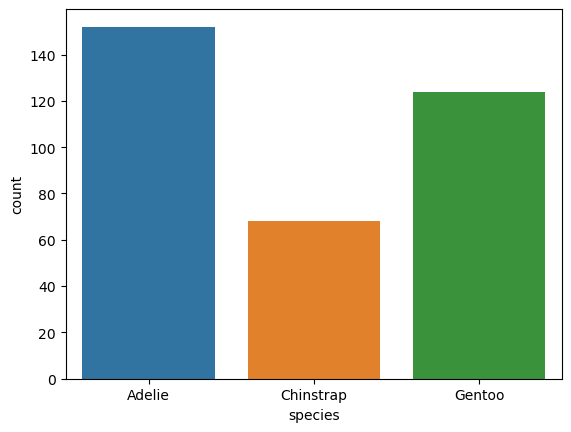

In [12]:
# visualize each label
sns.countplot(x='species', data=data, )
plt.show()

Dari histogram yang dihasilkan terdapat ketikdaseimbangan data pada data spesies pinguin dimana data untuk "species" "Chinstrap" jauh lebih sedikit dibandaingkan "species" lainnya.

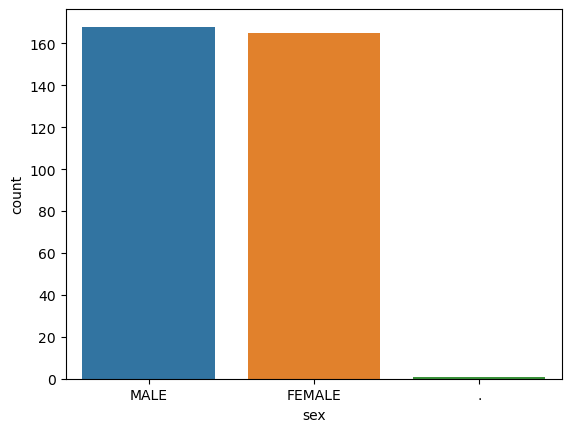

In [13]:
# visualize each label
sns.countplot(x='sex', data=data, )
plt.show()

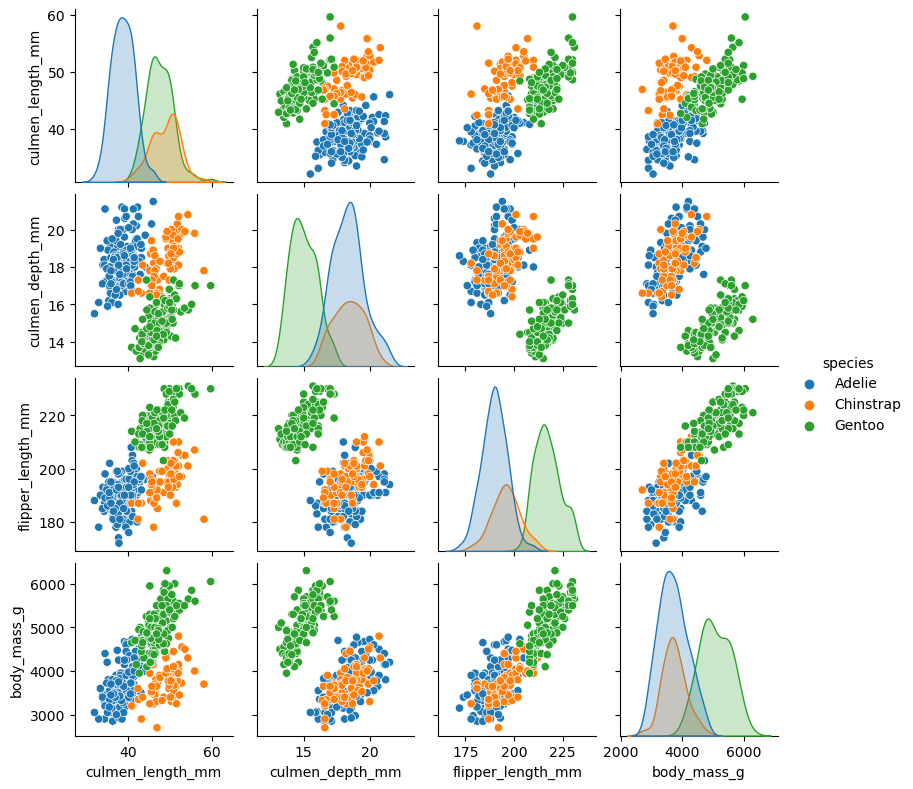

In [14]:
# plot all the columns' relationship
sns.pairplot(data.drop(['island'], axis = 1),
             hue='species', height=2)

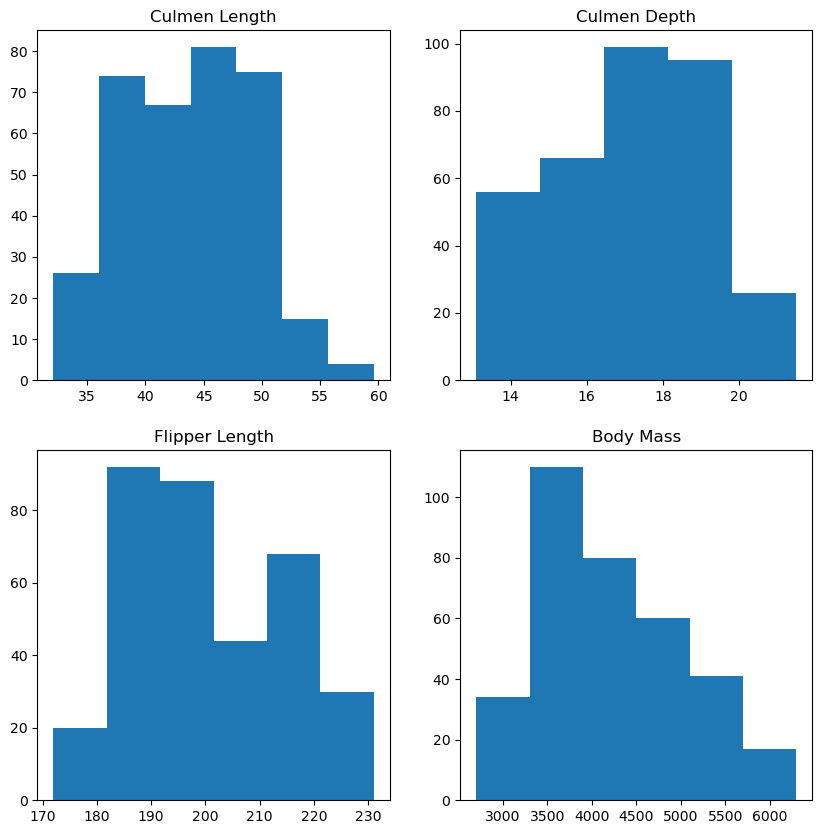

In [15]:
# visualize using Histogram to see the distribution of data for each columns
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Culmen Length")
axes[0,0].hist(data['culmen_length_mm'], bins=7)
 
axes[0,1].set_title("Culmen Depth")
axes[0,1].hist(data['culmen_depth_mm'], bins=5);
 
axes[1,0].set_title("Flipper Length")
axes[1,0].hist(data['flipper_length_mm'], bins=6);
 
axes[1,1].set_title("Body Mass")
axes[1,1].hist(data['body_mass_g'], bins=6);

c:\Users\mjova\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mjova\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mjova\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

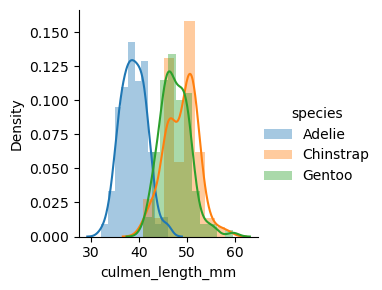

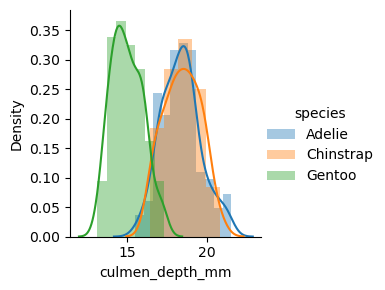

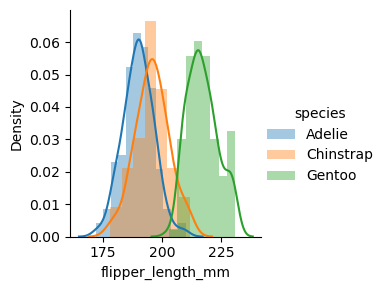

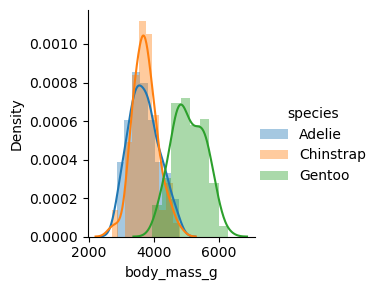

In [16]:
# Histogram with Displot
plot = sns.FacetGrid(data, hue="species")
plot.map(sns.distplot, "culmen_length_mm").add_legend()
 
plot = sns.FacetGrid(data, hue="species")
plot.map(sns.distplot, "culmen_depth_mm").add_legend()
 
plot = sns.FacetGrid(data, hue="species")
plot.map(sns.distplot, "flipper_length_mm").add_legend()
 
plot = sns.FacetGrid(data, hue="species")
plot.map(sns.distplot, "body_mass_g").add_legend()
 
plt.show()

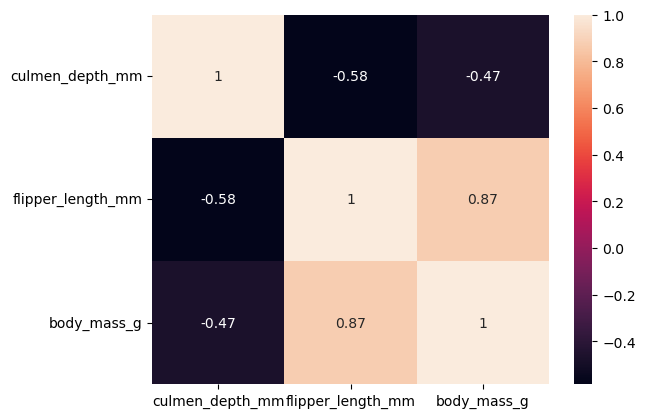

In [17]:
# visualize correlation using heatmaps
sns.heatmap(data.corr(method='pearson').drop(
  ['culmen_length_mm'], axis=1).drop(['culmen_length_mm'], axis=0),
            annot = True);
 
plt.show()

Berdasarkan Heat Map yang dioutputkan, korelasi data yang paling kuat ada pada "flipper_length_mm" dengan "body_mass_g" dimana nilainya adalah 0.87

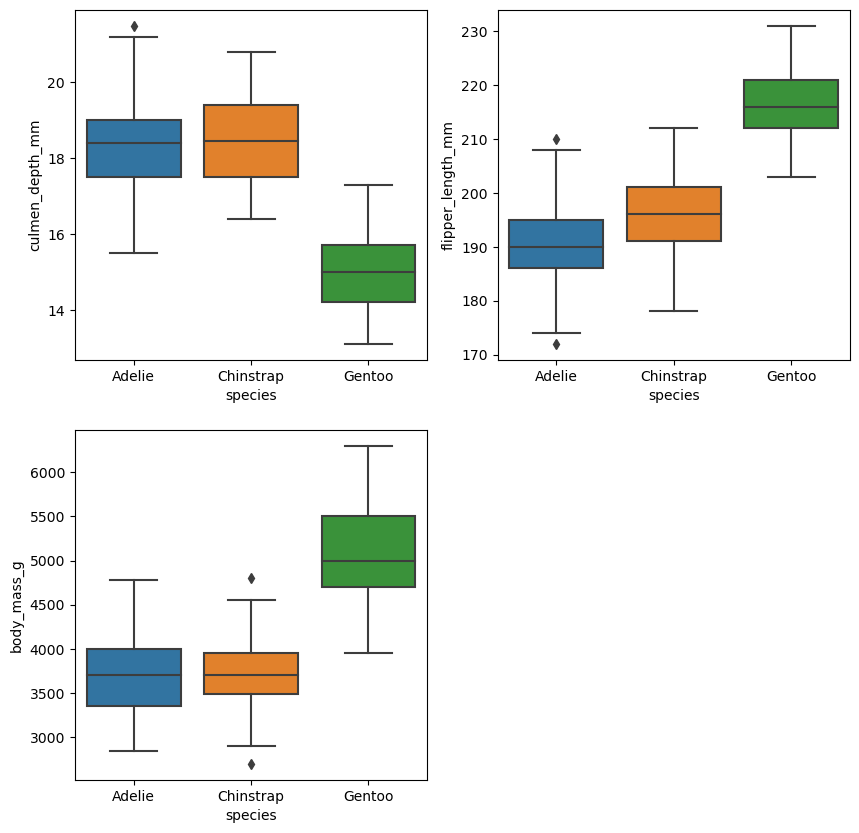

In [18]:
# using boxplot to see the distribution of 
# categorical values with numerical values
def graph(y):
    sns.boxplot(x="species", y=y, data=data)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('culmen_depth_mm')
 
plt.subplot(222)
graph('flipper_length_mm')
 
plt.subplot(223)
graph('body_mass_g')
 
plt.show()

Old Shape:  (344, 7)
New Shape:  (344, 7)


<AxesSubplot:xlabel='culmen_depth_mm'>

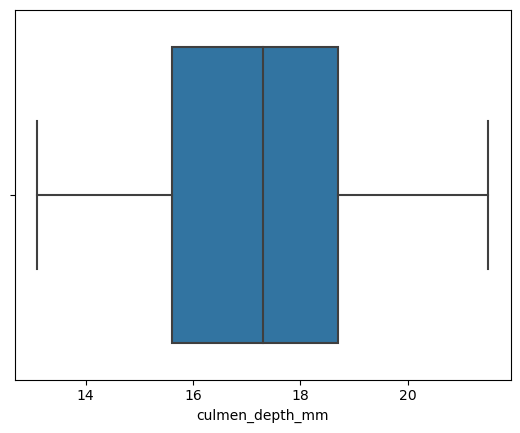

In [19]:
import numpy as np
# IQR
Q1 = np.percentile(data['culmen_depth_mm'], 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(data['culmen_depth_mm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['culmen_depth_mm'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(data['culmen_depth_mm'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)
 
sns.boxplot(x='culmen_depth_mm', data=data)